<a href="https://colab.research.google.com/github/hellocrisel/data-science/blob/main/Support_Vector_Classifier_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Support Vector Classifier Strategy**

**Create a Support Vector Classifier (SVC) algorithm on S&P 500.**

Support Vector Machine (SVM) is a supervised learning algorithm used for regression, classification, and outlier detection. The main objective of SVM is to create a line or a hyperplane which separates the data into classes.

**Import Libraries**


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")

**Read S&P 500**

In [8]:
#read the csv file
df = pd.read_csv ("/content/drive/MyDrive/SPY.csv",index_col=0)

#Convert index to datetime format

df.index = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,3442870000
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000


##**Define the Explanatory Variables**

Explanatory or independent variables are used to predict the value. The X is a dataset that holds the features that SVC algorithm will use as independent variables for prediction. The X consists of variables such as Open - Close and High - Low. These can be understood as indicators based on which the algorithm will predict tomorrow's trend. The choice of using Open - Close and High - Lowas features is arbitrary. Feel free to add more features and see the performance.

In [9]:
#Create predictor variables
df ['Open-Close'] = df.Open - df.Close
df ['High-Low'] = df.High - df.Low

#Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2018-12-31,-7.910156,26.419922
2019-01-02,-33.070068,52.020020
2019-01-03,44.030029,49.179932
2019-01-04,-57.609863,63.739990
2019-01-07,-14.079834,41.599854


##**Define the target variable**

Target variable is the outcome which the machine learning model will predict based on the explanatory variables. y is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict. If tomorrow's price is greater than today's price then we will buy the S&P 500 index, else we will have no position in the S&P 500 index. We will store 1 for a buy signal and 0 for a no position in y.

In [13]:
#Target Variables
y = np.where(df['Close'].shift(-1) > df ['Close'], 1, 0)

#Print y
y

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

##**Split the data into train and test**

We will split data into training and test datasets. This is done so that we can fit the model on the training data and test the performance on the test data.

First, 80% of data is used for training and remaining data for testing.
X_train and y_train are train datasets.
X_test and y_test are test datasets.

In [18]:
#Define the split percentage
split_percentage = 0.8
split = int(split_percentage*len(df))

#Train data set
X_train = X[:split]
y_train = y[: split]

#Test data set
X_test = X[split:]
y_test = y[split:]

**Training the dataset**

**Support Vector Classifier (SVC)**

We will use SVC() function from sklearn.svm.SVC library to create our classifier model using fit() method on the training dataset.

Parameters:
1.   X: Explanatory variables in the training set
2.   y: Target variable in the training set






In [19]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [20]:
# predict signals
y_predict = cls.predict(X_test)

##**Classifier accuracy**

Compute the accuracy of the algorithm on the train and test data set by comparing the actual values of signal with the predicted values of signal. The function accuracy_score() will be used to calculate the accuracy.



In [21]:
#Train and test accuracy
accuracy_test = accuracy_score(y_test, y_predict)

print('Accuracy:{: .2f}%'.format(accuracy_test*100))

Accuracy: 54.32%


**Observation:**

An accuracy of 50% + in test data suggests that the classifier model is effective.

##**Strategy Implementation**

**Predict Signal**

 Predict Signal (buy or sell) using the cls.predict() function.

**Compute Returns in Test Period**

 Predict the signals om the entire dataset X. And then compute strategy returns on the predict signal, and then save it in the column cumulative_returns and plot cumulative returns.


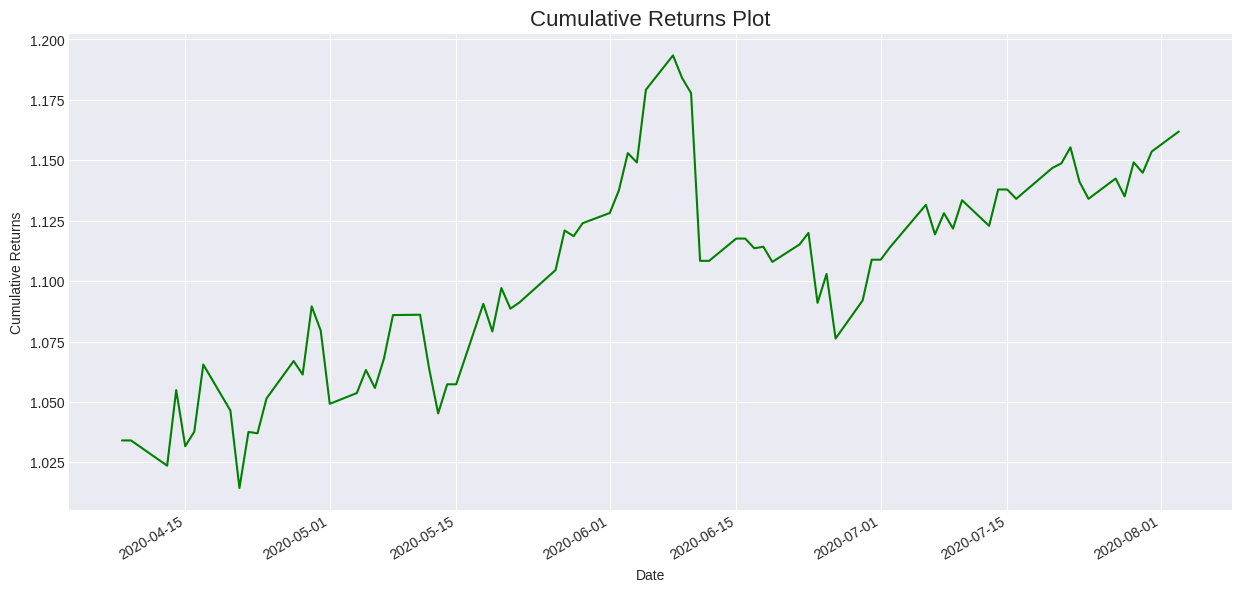

In [25]:
# Predicted Signal
df['Predicted_Signal']= cls.predict(X)

#Calculate daily returns
df['Returns'] = df.Close.pct_change()

#Calculate Strategy returns
df['Strategy_Returns'] = df.Returns * df.Predicted_Signal.shift(1)

#Calculate geometric returns
df['cumulative_returns'] = (df.Strategy_Returns.iloc[split:]+1).cumprod()

#Set the title and axis labels
plt.title("Cumulative Returns Plot", fontsize = 16)
plt.ylabel("Cumulative Returns")
plt.xlabel ("Date")

#Plot geometric returns
df['cumulative_returns'].plot(figsize=(15,7), color = 'g')

plt.show()

**Observations:**

As seen in the graph, the strategy generates a return of approximately 16% in the test data set.
